In [1]:
# ==================== IMPORTS ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

In [4]:
# ==================== 1. LOAD DATA ====================
print("="*80)
print("CREDIT CARD FRAUD DETECTION - EDA")
print("="*80)

creditcard = pd.read_csv('../data/raw/creditcard.csv')
print(f"\n✓ Data loaded: {creditcard.shape}")
print(f"  Rows: {creditcard.shape[0]:,}")
print(f"  Columns: {creditcard.shape[1]}")

# Display first rows
print("\nFirst 5 rows:")
print(creditcard.head())

CREDIT CARD FRAUD DETECTION - EDA

✓ Data loaded: (284807, 31)
  Rows: 284,807
  Columns: 31

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.

In [5]:
# ==================== 2. DATA INFO ====================
print("\n" + "="*80)
print("DATASET INFORMATION")
print("="*80)

print("\n--- Data Types ---")
print(creditcard.dtypes.value_counts())

print("\n--- Memory Usage ---")
print(f"Total memory: {creditcard.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n--- Column Names ---")
print(f"Columns: {list(creditcard.columns)}")


DATASET INFORMATION

--- Data Types ---
float64    30
int64       1
Name: count, dtype: int64

--- Memory Usage ---
Total memory: 67.36 MB

--- Column Names ---
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [6]:
# ==================== 3. DATA QUALITY ====================
print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Missing values
print("\n1. Missing Values:")
missing = creditcard.isnull().sum().sum()
print(f"   Total missing: {missing}")
if missing == 0:
    print("   ✓ No missing values!")

# Duplicates
print("\n2. Duplicates:")
duplicates = creditcard.duplicated().sum()
print(f"   Total duplicates: {duplicates}")
if duplicates > 0:
    print(f"   Percentage: {duplicates/len(creditcard)*100:.2f}%")

# Statistics
print("\n3. Summary Statistics:")
print(creditcard.describe())


DATA QUALITY ASSESSMENT

1. Missing Values:
   Total missing: 0
   ✓ No missing values!

2. Duplicates:
   Total duplicates: 1081
   Percentage: 0.38%

3. Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.8


CLASS DISTRIBUTION ANALYSIS

Class Distribution:
  Normal (0):  284,315 (99.8273%)
  Fraud (1):   492 (0.1727%)

⚠️  Extreme Imbalance Ratio: 1:578
    → This is a SEVERE class imbalance!


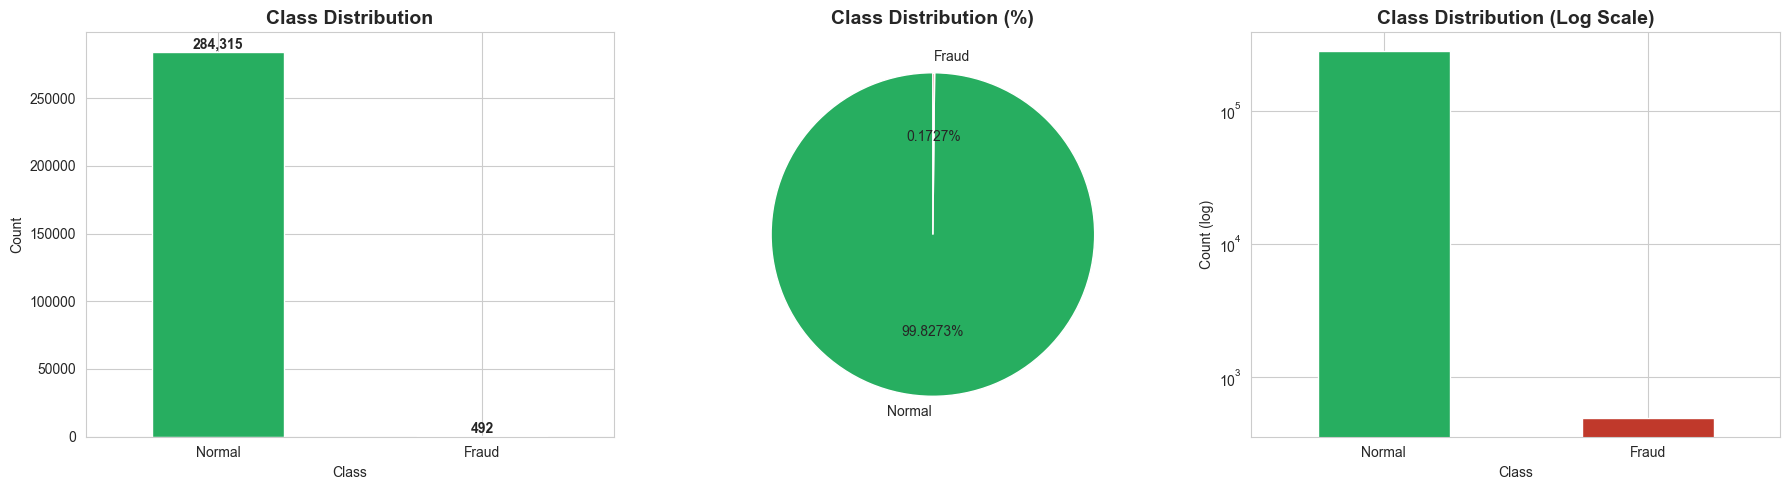

In [7]:
# ==================== 4. CLASS DISTRIBUTION ====================
print("\n" + "="*80)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*80)

class_counts = creditcard['Class'].value_counts()
class_pct = creditcard['Class'].value_counts(normalize=True) * 100

print("\nClass Distribution:")
print(f"  Normal (0):  {class_counts[0]:,} ({class_pct[0]:.4f}%)")
print(f"  Fraud (1):   {class_counts[1]:,} ({class_pct[1]:.4f}%)")

imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\n⚠️  Extreme Imbalance Ratio: 1:{imbalance_ratio:.0f}")
print(f"    → This is a SEVERE class imbalance!")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot
class_counts.plot(kind='bar', ax=axes[0], color=['#27ae60', '#c0392b'])
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Normal', 'Fraud'], rotation=0)
for i, v in enumerate(class_counts):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(class_counts, labels=['Normal', 'Fraud'], autopct='%1.4f%%',
            colors=['#27ae60', '#c0392b'], startangle=90)
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

# Log scale
class_counts.plot(kind='bar', ax=axes[2], color=['#27ae60', '#c0392b'], logy=True)
axes[2].set_title('Class Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Count (log)')
axes[2].set_xticklabels(['Normal', 'Fraud'], rotation=0)

plt.tight_layout()
plt.savefig('creditcard_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


TIME FEATURE ANALYSIS

Time Statistics:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


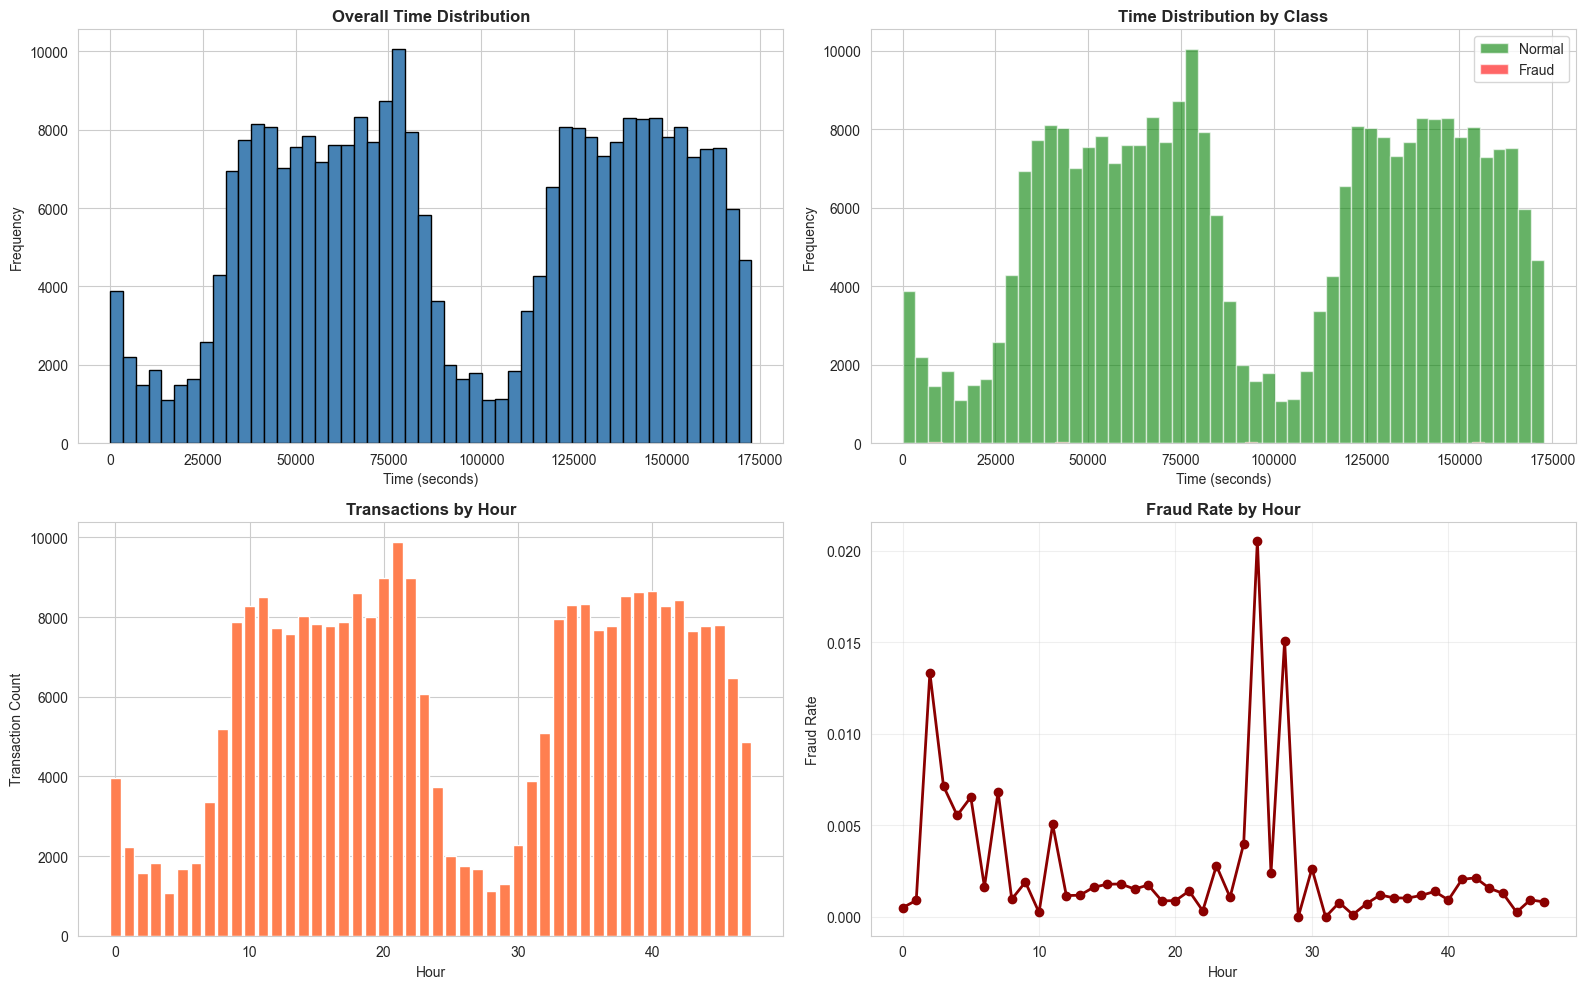

In [8]:
# ==================== 5. FEATURE ANALYSIS - TIME ====================
print("\n" + "="*80)
print("TIME FEATURE ANALYSIS")
print("="*80)

print("\nTime Statistics:")
print(creditcard['Time'].describe())

# Time distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Overall time distribution
axes[0, 0].hist(creditcard['Time'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Overall Time Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Time (seconds)')
axes[0, 0].set_ylabel('Frequency')

# Time by class
axes[0, 1].hist(creditcard[creditcard['Class']==0]['Time'], bins=50, 
                alpha=0.6, label='Normal', color='green')
axes[0, 1].hist(creditcard[creditcard['Class']==1]['Time'], bins=50, 
                alpha=0.6, label='Fraud', color='red')
axes[0, 1].set_title('Time Distribution by Class', fontweight='bold')
axes[0, 1].set_xlabel('Time (seconds)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Convert time to hours
creditcard['Time_Hour'] = creditcard['Time'] / 3600

# Transactions by hour
time_hour_counts = creditcard.groupby(creditcard['Time_Hour'].astype(int))['Class'].count()
axes[1, 0].bar(time_hour_counts.index, time_hour_counts.values, color='coral')
axes[1, 0].set_title('Transactions by Hour', fontweight='bold')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Transaction Count')

# Fraud rate by hour
fraud_by_hour = creditcard.groupby(creditcard['Time_Hour'].astype(int))['Class'].mean()
axes[1, 1].plot(fraud_by_hour.index, fraud_by_hour.values, marker='o', 
                linewidth=2, color='darkred', markersize=6)
axes[1, 1].set_title('Fraud Rate by Hour', fontweight='bold')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Fraud Rate')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('creditcard_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


AMOUNT FEATURE ANALYSIS

Amount Statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Amount by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


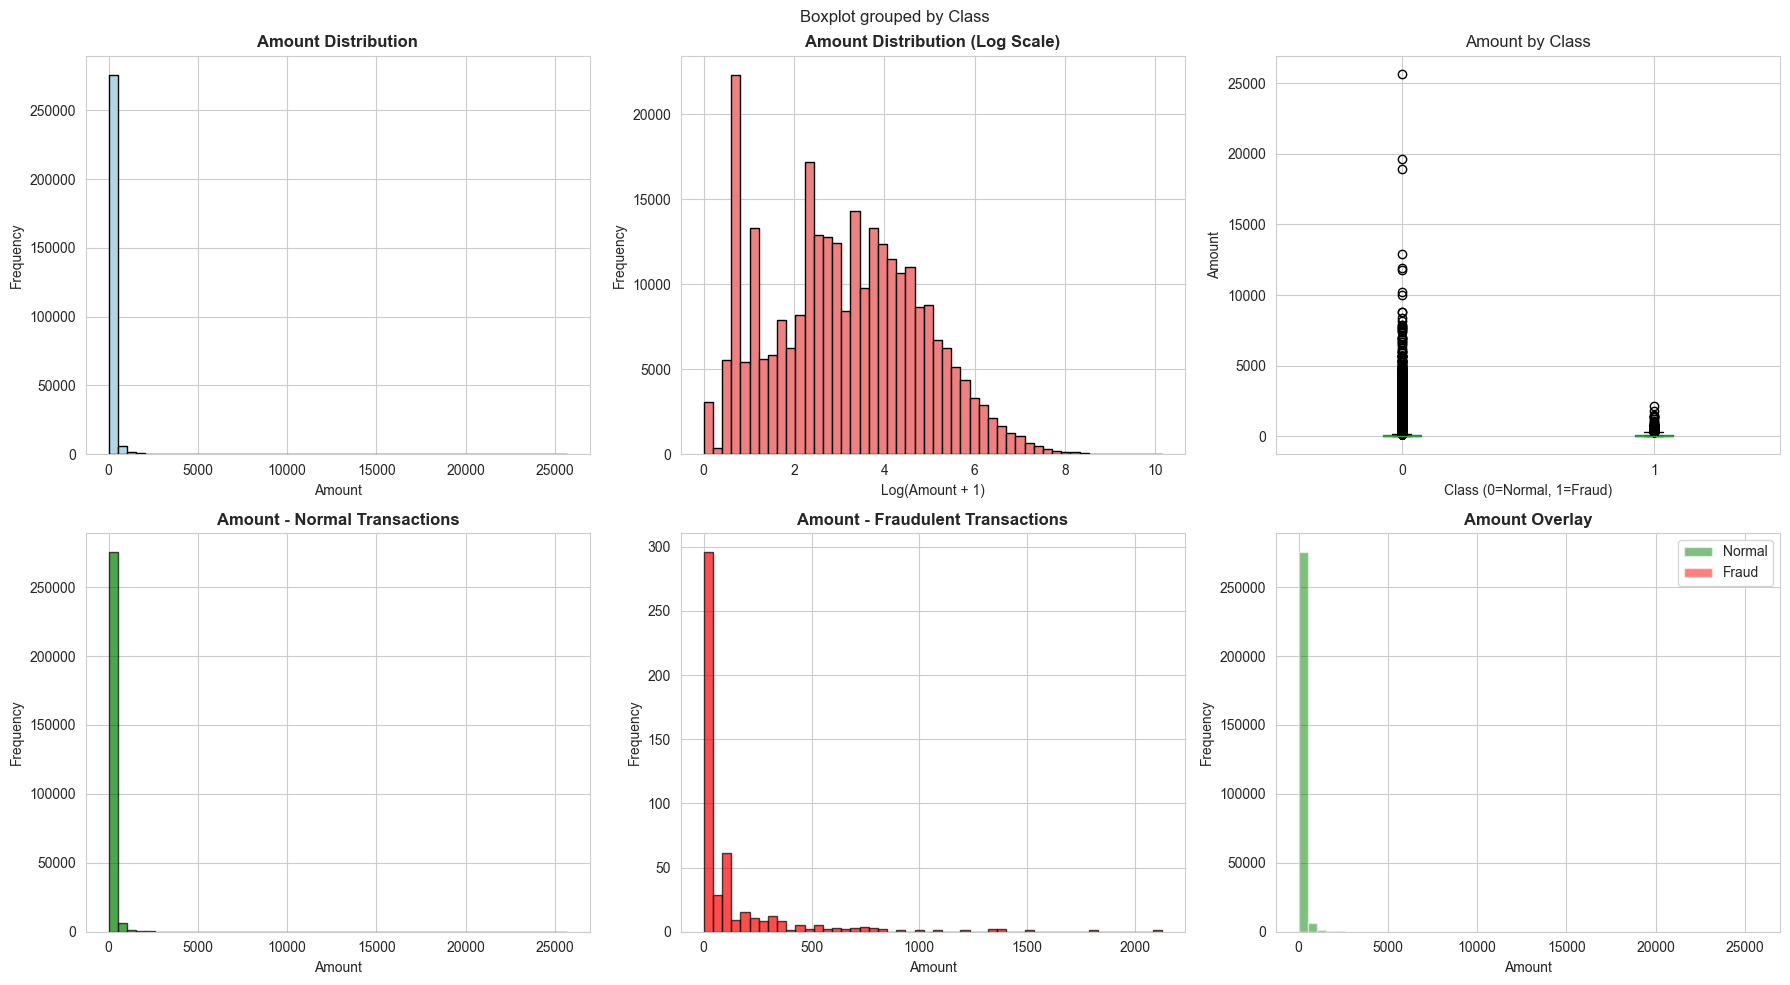

In [9]:
# ==================== 6. FEATURE ANALYSIS - AMOUNT ====================
print("\n" + "="*80)
print("AMOUNT FEATURE ANALYSIS")
print("="*80)

print("\nAmount Statistics:")
print(creditcard['Amount'].describe())

print("\nAmount by Class:")
print(creditcard.groupby('Class')['Amount'].describe())

# Amount distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Overall distribution
axes[0, 0].hist(creditcard['Amount'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Amount Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')

# Log scale
axes[0, 1].hist(np.log1p(creditcard['Amount']), bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Amount Distribution (Log Scale)', fontweight='bold')
axes[0, 1].set_xlabel('Log(Amount + 1)')
axes[0, 1].set_ylabel('Frequency')

# Box plot
creditcard.boxplot(column='Amount', by='Class', ax=axes[0, 2])
axes[0, 2].set_title('Amount by Class')
axes[0, 2].set_xlabel('Class (0=Normal, 1=Fraud)')
axes[0, 2].set_ylabel('Amount')

# By class - Normal
axes[1, 0].hist(creditcard[creditcard['Class']==0]['Amount'], bins=50, 
                color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Amount - Normal Transactions', fontweight='bold')
axes[1, 0].set_xlabel('Amount')
axes[1, 0].set_ylabel('Frequency')

# By class - Fraud
axes[1, 1].hist(creditcard[creditcard['Class']==1]['Amount'], bins=50, 
                color='red', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Amount - Fraudulent Transactions', fontweight='bold')
axes[1, 1].set_xlabel('Amount')
axes[1, 1].set_ylabel('Frequency')

# Overlay
axes[1, 2].hist(creditcard[creditcard['Class']==0]['Amount'], bins=50, 
                alpha=0.5, label='Normal', color='green')
axes[1, 2].hist(creditcard[creditcard['Class']==1]['Amount'], bins=50, 
                alpha=0.5, label='Fraud', color='red')
axes[1, 2].set_title('Amount Overlay', fontweight='bold')
axes[1, 2].set_xlabel('Amount')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('creditcard_amount_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


PCA FEATURES (V1-V28) ANALYSIS

Total PCA features: 28

PCA Features Statistics by Class:

Class 0:
            V1        V2        V3        V4        V5        V6        V7  \
mean  0.008258 -0.006271  0.012171 -0.007860  0.005453  0.002419  0.009637   
std   1.929814  1.636146  1.459429  1.399333  1.356952  1.329913  1.178812   

            V8        V9       V10  ...       V19       V20       V21  \
mean -0.000987  0.004467  0.009824  ... -0.001178 -0.000644 -0.001235   
std   1.161283  1.089372  1.044204  ...  0.811733  0.769404  0.716743   

           V22       V23       V24       V25       V26       V27       V28  
mean -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131  
std   0.723668  0.621541  0.605776  0.520673  0.482241  0.399847  0.329570  

[2 rows x 28 columns]

Class 1:
            V1        V2        V3        V4        V5        V6        V7  \
mean -4.771948  3.623778 -7.033281  4.542029 -3.151225 -1.397737 -5.568731   
std   6.783687  4.291216

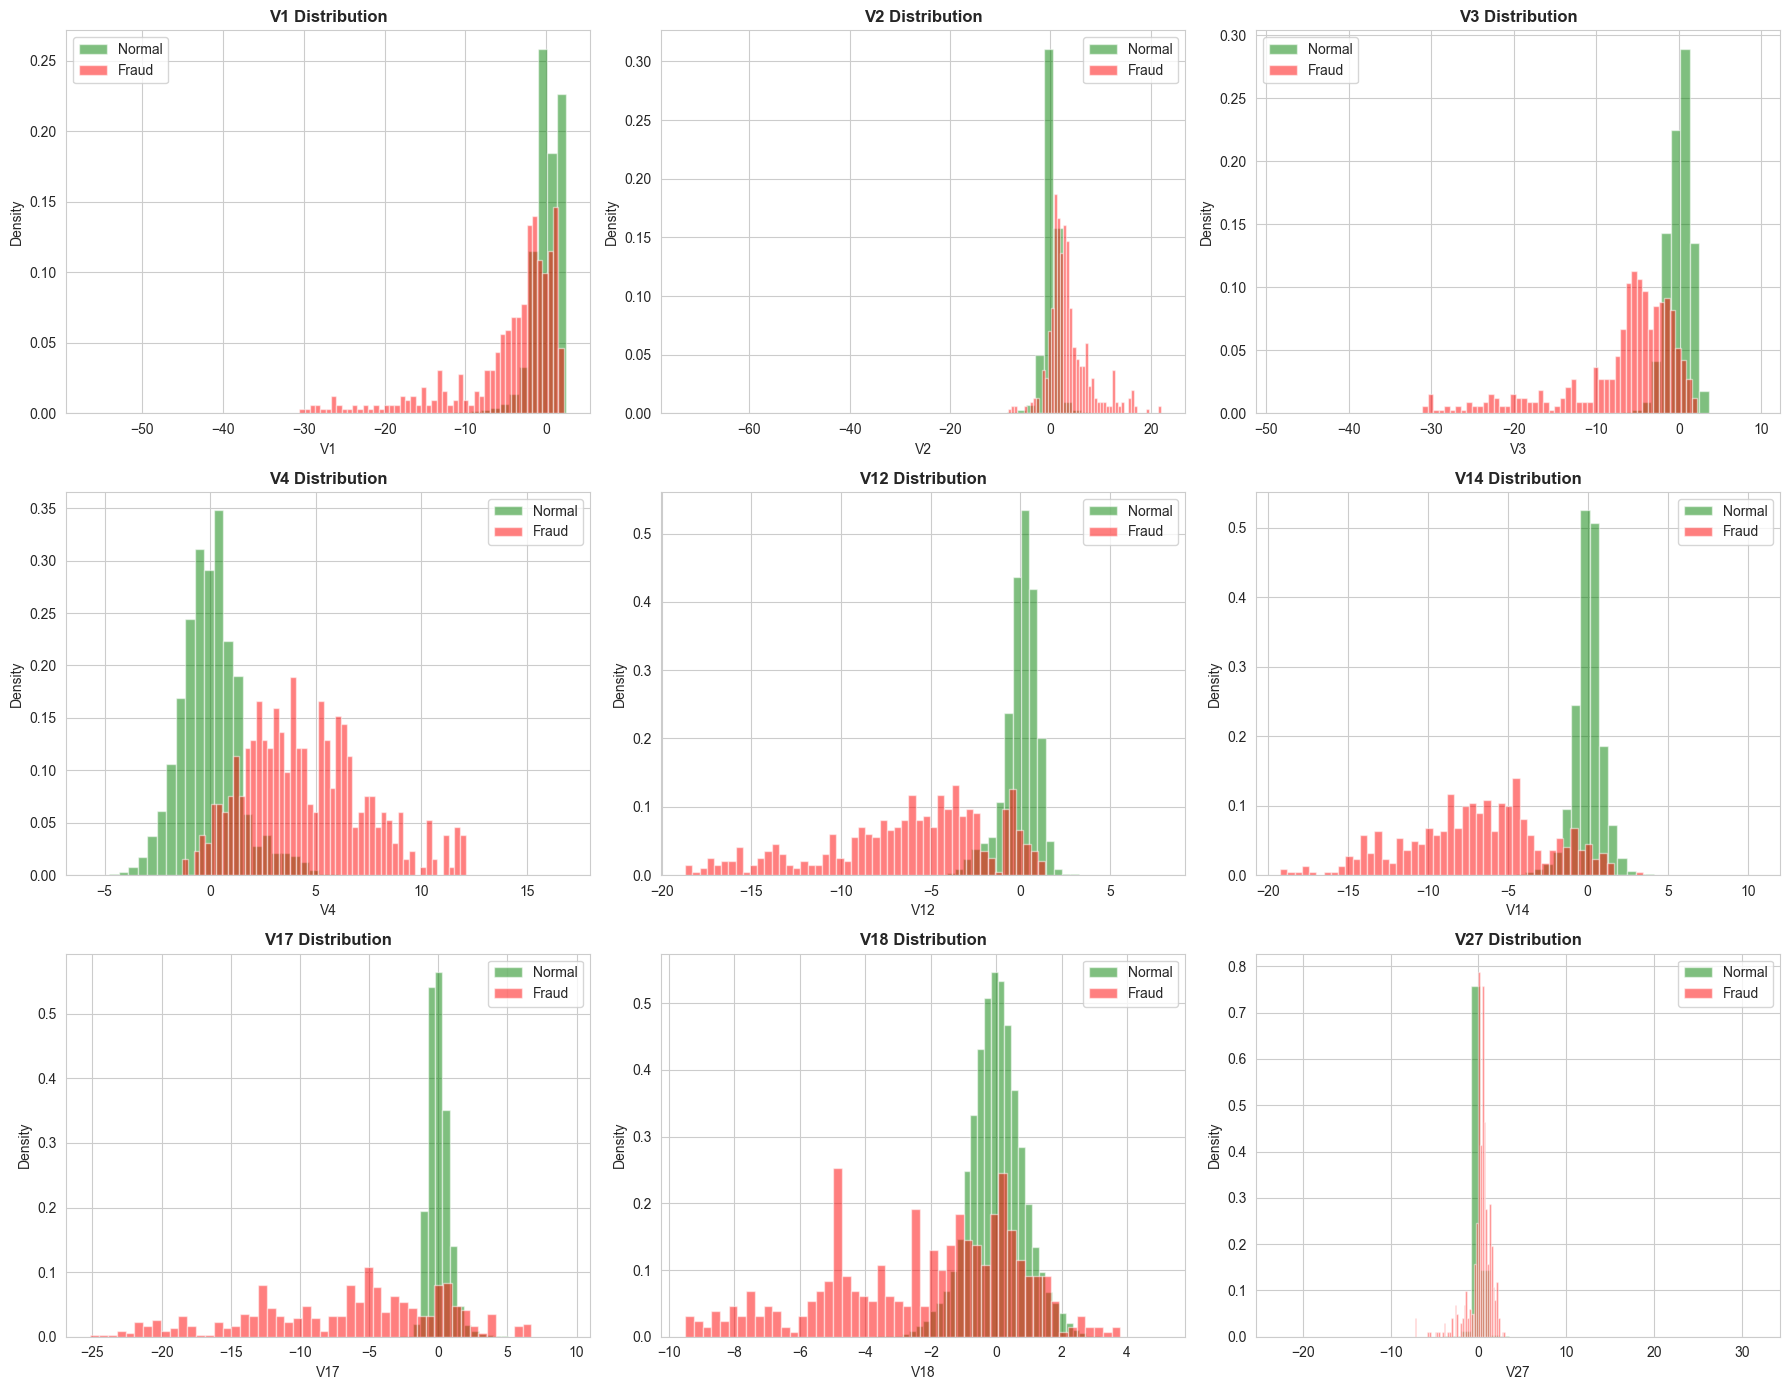

In [10]:
# ==================== 7. PCA FEATURES ANALYSIS ====================
print("\n" + "="*80)
print("PCA FEATURES (V1-V28) ANALYSIS")
print("="*80)

# Get V columns
v_columns = [col for col in creditcard.columns if col.startswith('V')]
print(f"\nTotal PCA features: {len(v_columns)}")

# Statistics by class
print("\nPCA Features Statistics by Class:")
for class_val in [0, 1]:
    print(f"\nClass {class_val}:")
    print(creditcard[creditcard['Class']==class_val][v_columns].describe().loc[['mean', 'std']])

# Distribution of selected V features
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

selected_v = ['V1', 'V2', 'V3', 'V4', 'V12', 'V14', 'V17', 'V18', 'V27']

for idx, col in enumerate(selected_v):
    axes[idx].hist(creditcard[creditcard['Class']==0][col], bins=50, 
                   alpha=0.5, label='Normal', color='green', density=True)
    axes[idx].hist(creditcard[creditcard['Class']==1][col], bins=50, 
                   alpha=0.5, label='Fraud', color='red', density=True)
    axes[idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Density')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('creditcard_v_features.png', dpi=300, bbox_inches='tight')
plt.show()



CORRELATION ANALYSIS

Top 15 Positive Correlations with Class:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
Name: Class, dtype: float64

Top 15 Negative Correlations with Class:
V24         -0.007221
Time        -0.012323
Time_Hour   -0.012323
V6          -0.043643
V5          -0.094974
V9          -0.097733
V1          -0.101347
V18         -0.111485
V7          -0.187257
V3          -0.192961
V16         -0.196539
V10         -0.216883
V12         -0.260593
V14         -0.302544
V17         -0.326481
Name: Class, dtype: float64


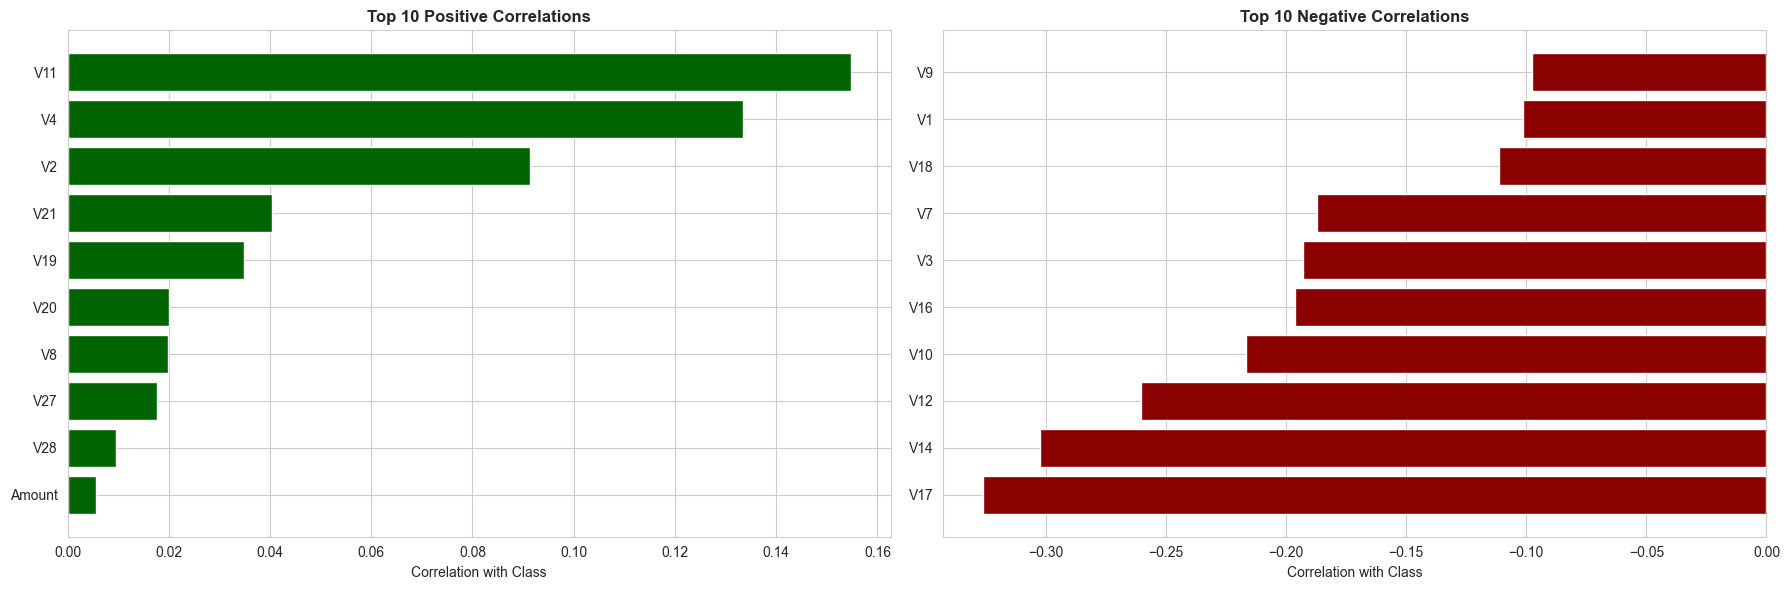


High correlation features (|corr| > 0.3): ['Class', 'V14', 'V17']


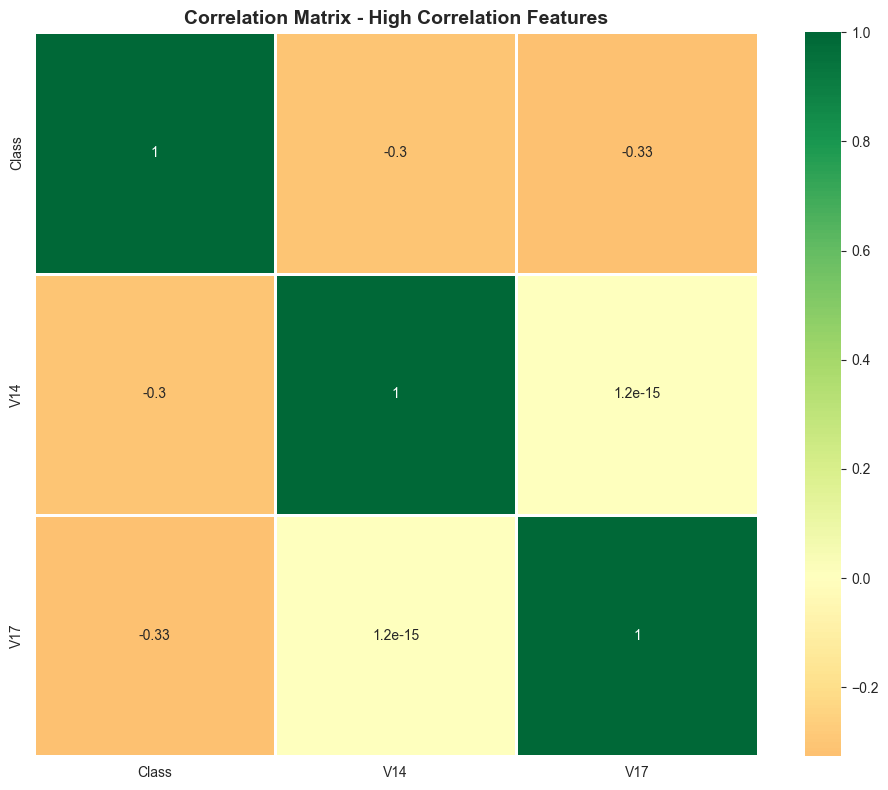

In [11]:
# ==================== 8. CORRELATION ANALYSIS ====================
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Correlation with target
correlations = creditcard.corr()['Class'].sort_values(ascending=False)
print("\nTop 15 Positive Correlations with Class:")
print(correlations.head(15))

print("\nTop 15 Negative Correlations with Class:")
print(correlations.tail(15))

# Visualize correlations
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top positive
top_pos = correlations[1:11]
axes[0].barh(range(len(top_pos)), top_pos.values, color='darkgreen')
axes[0].set_yticks(range(len(top_pos)))
axes[0].set_yticklabels(top_pos.index)
axes[0].set_xlabel('Correlation with Class')
axes[0].set_title('Top 10 Positive Correlations', fontweight='bold')
axes[0].invert_yaxis()

# Top negative
top_neg = correlations[-10:]
axes[1].barh(range(len(top_neg)), top_neg.values, color='darkred')
axes[1].set_yticks(range(len(top_neg)))
axes[1].set_yticklabels(top_neg.index)
axes[1].set_xlabel('Correlation with Class')
axes[1].set_title('Top 10 Negative Correlations', fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('creditcard_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation matrix for highly correlated features
high_corr_features = list(correlations[abs(correlations) > 0.3].index)
if 'Class' in high_corr_features:
    high_corr_features.remove('Class')
high_corr_features = ['Class'] + high_corr_features

print(f"\nHigh correlation features (|corr| > 0.3): {high_corr_features}")

plt.figure(figsize=(10, 8))
sns.heatmap(creditcard[high_corr_features].corr(), annot=True, cmap='RdYlGn', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix - High Correlation Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('creditcard_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()



OUTLIER ANALYSIS

Amount Outliers (IQR method):
  Total outliers: 31904 (11.20%)
  Q1: 5.60, Q3: 77.16, IQR: 71.56


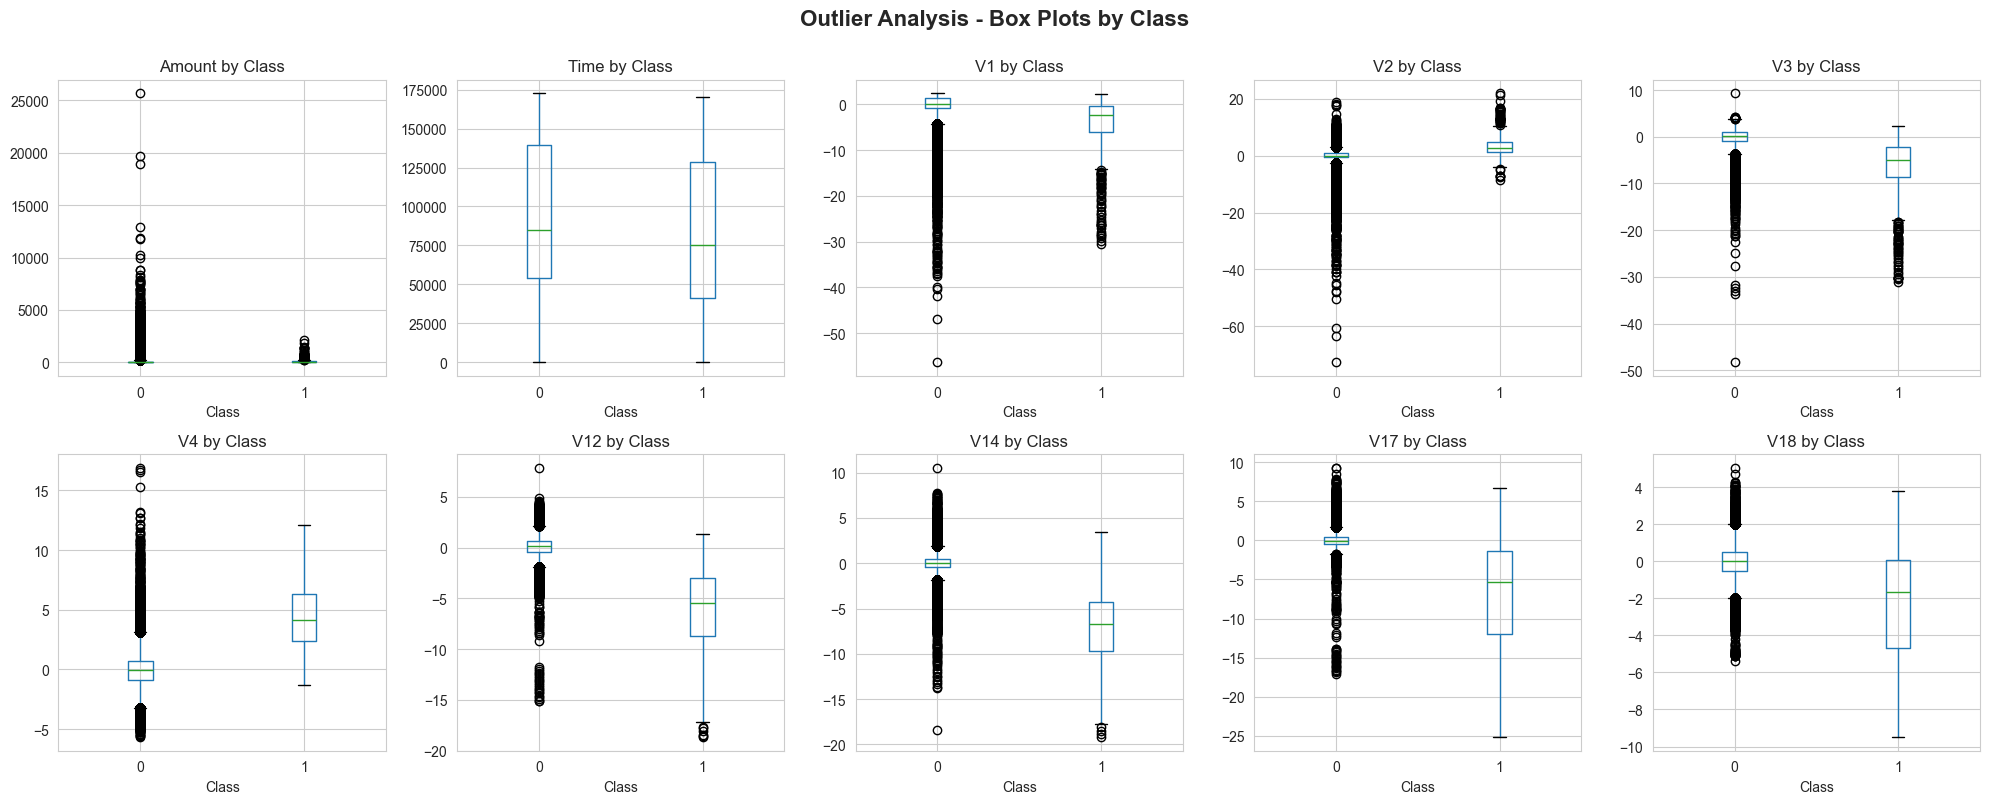

In [12]:
# ==================== 9. OUTLIER ANALYSIS ====================
print("\n" + "="*80)
print("OUTLIER ANALYSIS")
print("="*80)

# Amount outliers
Q1 = creditcard['Amount'].quantile(0.25)
Q3 = creditcard['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((creditcard['Amount'] < (Q1 - 1.5 * IQR)) | 
            (creditcard['Amount'] > (Q3 + 1.5 * IQR))).sum()

print(f"\nAmount Outliers (IQR method):")
print(f"  Total outliers: {outliers} ({outliers/len(creditcard)*100:.2f}%)")
print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")

# Box plots for outlier visualization
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

selected_features = ['Amount', 'Time'] + selected_v[:8]

for idx, col in enumerate(selected_features):
    creditcard.boxplot(column=col, by='Class', ax=axes[idx])
    axes[idx].set_title(f'{col} by Class')
    axes[idx].set_xlabel('Class')

plt.suptitle('Outlier Analysis - Box Plots by Class', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('creditcard_outliers.png', dpi=300, bbox_inches='tight')
plt.show()


In [14]:
# ==================== 11. SAVE FOR NEXT STAGE ====================
print("\n" + "="*80)
print("SAVING DATA")
print("="*80)

creditcard.to_csv('../data/processed/creditcard_explored.csv', index=False)
print("✓ Saved: creditcard_explored.csv")

print("\n" + "="*80)
print("EDA COMPLETE - READY FOR FEATURE ENGINEERING")


SAVING DATA
✓ Saved: creditcard_explored.csv

EDA COMPLETE - READY FOR FEATURE ENGINEERING
